In [1]:
# !pip3 install geopandas matplotlib contextily
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# Load the shapefile
shapefile_path = '../Armenia/arm_admbnda_adm0_2019.shp'
shapefile_gdf = gpd.read_file(shapefile_path)

# Load the points data (assuming it's a CSV with 'longitude' and 'latitude' columns)
points_df = pd.read_csv('points.csv')
points_gdf = gpd.GeoDataFrame(points_df, geometry=gpd.points_from_xy(points_df.lon, points_df.lat))
points_gdf.set_crs(shapefile_gdf.crs, inplace=True)  # Set the CRS to match the shapefile

stations_df = pd.read_csv('../stations.csv')
stations_gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df.Longitude, stations_df.Latitude))
stations_gdf.set_crs(shapefile_gdf.crs, inplace=True) 

print(stations_gdf)

FileNotFoundError: [Errno 2] No such file or directory: '../../stations.csv'

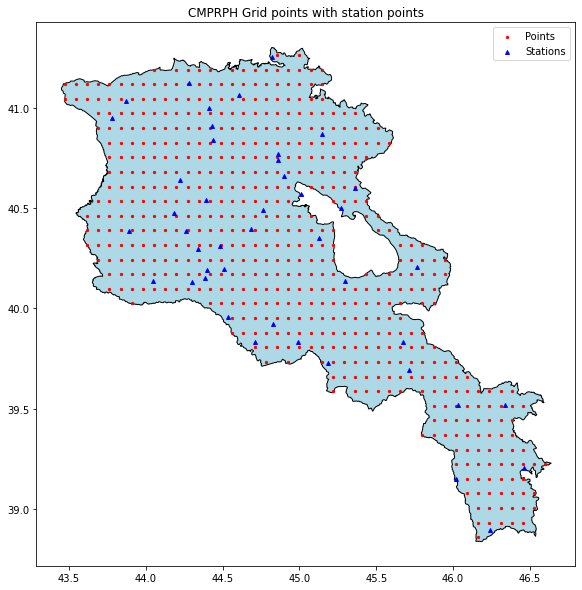

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
shapefile_gdf.plot(ax=ax, color='lightblue', edgecolor='black')  # Plot the shapefile
points_gdf.plot(ax=ax, marker='o', color='red', markersize=5,label='Points')  # Plot the points
stations_gdf.plot(ax=ax, marker='^', color='blue', markersize=15,label='Stations')  # Plot the stations

# # Add labels for the stations
# for idx, row in stations_gdf.iterrows():
#     ax.text(row.geometry.x, row.geometry.y, row.Name, fontsize=9, ha='left', va='bottom')
ax.set_title('CMPRPH Grid points with station points')  # Set the title
ax.legend()  # Add the legend
plt.show()